<a href="https://colab.research.google.com/github/Deeprajshrivastav/AWT-project/blob/main/ModelComparision/ModelComaprision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import all required Library
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from prettytable import PrettyTable        
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Deeprajshrivastav/Machine-Learning-dataset/main/data%20(1).csv')
print("Shape od dataSet:", data.shape)

Shape od dataSet: (569, 33)


In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
309,893548,B,13.05,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,...,17.40,93.96,672.4,0.1016,0.05847,0.01824,0.03532,0.2107,0.06580,NaN
90,861648,B,14.62,24.02,94.57,662.7,0.08974,0.08606,0.031020,0.029570,...,29.11,102.90,803.7,0.1115,0.17660,0.09189,0.06946,0.2522,0.07246,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.043040,...,33.17,100.20,706.7,0.1241,0.22640,0.13260,0.10480,0.2250,0.08321,NaN
249,884689,B,11.52,14.93,73.87,406.3,0.10130,0.07808,0.043280,0.029290,...,21.19,80.88,491.8,0.1389,0.15820,0.18040,0.09608,0.2664,0.07809,NaN
187,874373,B,11.71,17.19,74.68,420.3,0.09774,0.06141,0.038090,0.032390,...,21.39,84.42,521.5,0.1323,0.10400,0.15210,0.10990,0.2572,0.07097,NaN


In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Conclusion: id and Unnamed 32 columns has no meaning for predicting the cancer

In [ ]:
# drop  id and Unnamed 32 columns
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

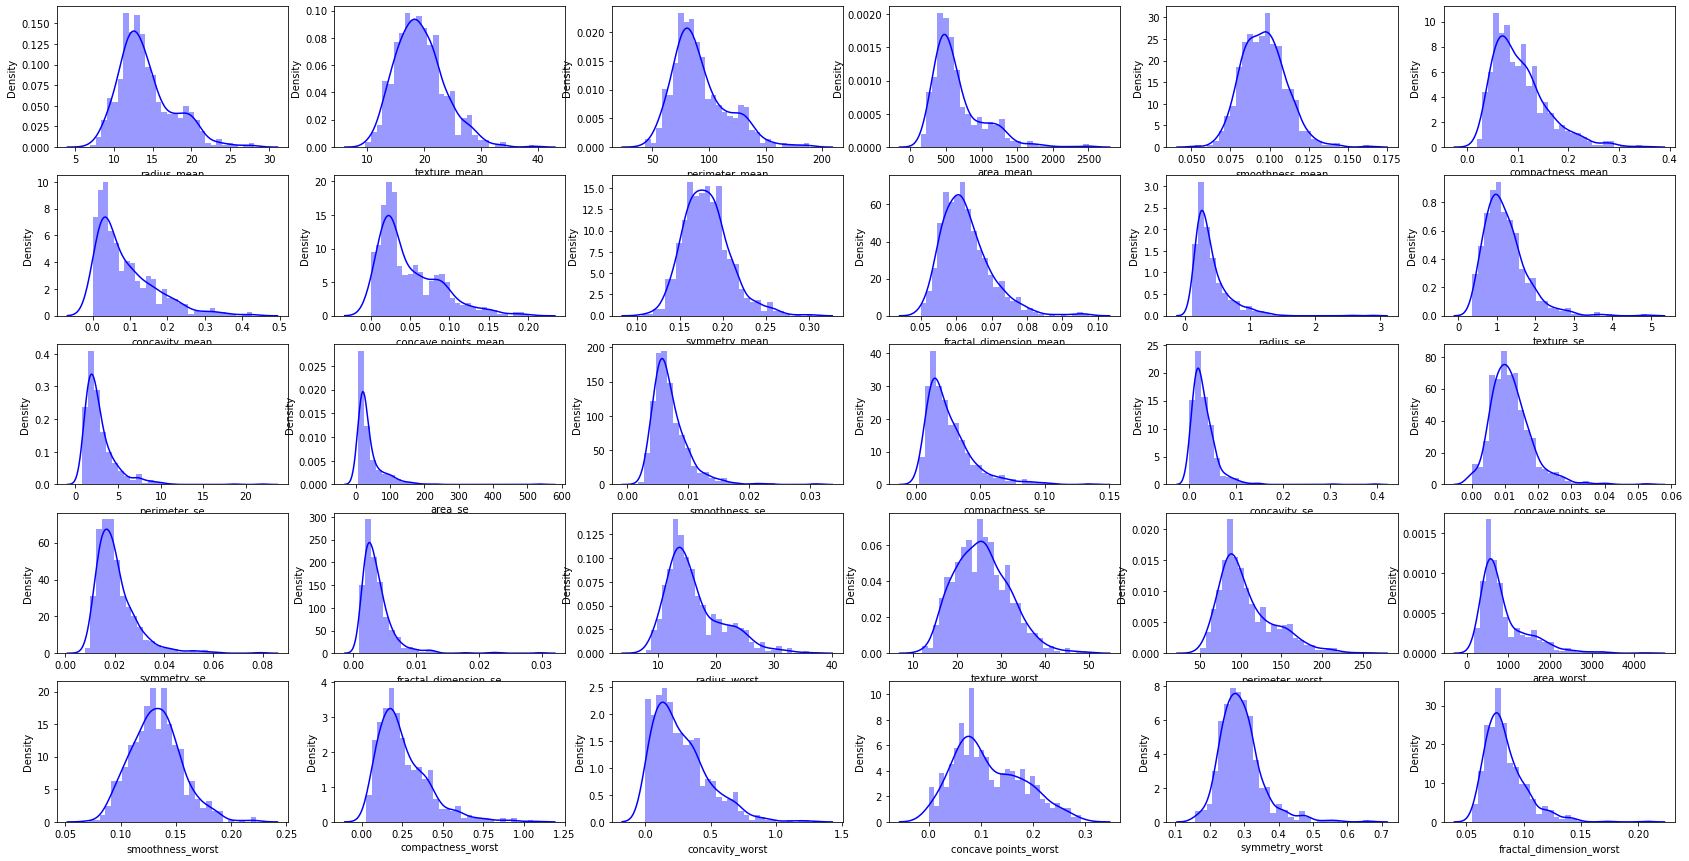

In [ ]:
fig, axs = plt.subplots(5,6, figsize = (29,15))
c = 0
r = 0
for col in list(data.columns):
    if col != 'diagnosis':
        sns.distplot(data[col], kde = True, color ='blue', bins = 30, ax=axs[c, r])
        r += 1
        if r == 6:
            c += 1
            r = 0

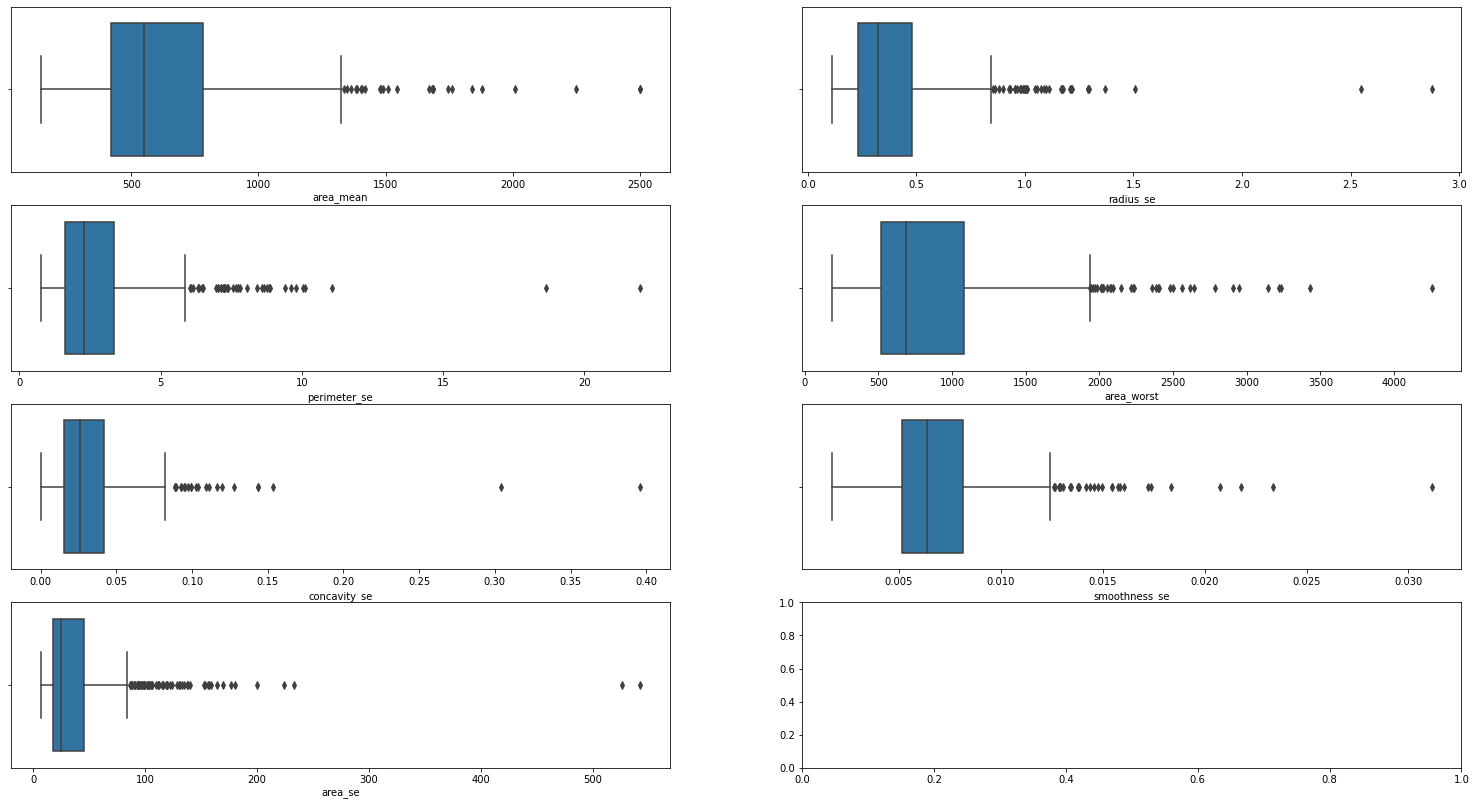

In [ ]:
fig, axs = plt.subplots(4,2, figsize = (26,14))
plt1 = sns.boxplot(data['area_mean'], ax = axs[0,0])
plt2 = sns.boxplot(data['radius_se'], ax = axs[0,1])
plt3 = sns.boxplot(data['perimeter_se'], ax = axs[1,0])
plt4 = sns.boxplot(data['area_worst'], ax = axs[1,1])
plt5 = sns.boxplot(data['concavity_se'], ax = axs[2,0])
plt6 = sns.boxplot(data['smoothness_se'], ax = axs[2,1])
plt7 = sns.boxplot(data['area_se'], ax = axs[3,0])

### Outlier Treatment

**Outlier:**

An outlier is a data point in a data set that is distant from all other.A data point that lies outside the overall distribution of dataset. <br> <br>
**Step to identify Outlier.**

Step1: calculate the 1st and 3rd quartiles(Q1, Q3) <br>
Step2: compute IQR=Q3-Q1 <br>
Step3: compute lower bound = (Q1–1.5IQR), upper bound = (Q3+1.5IQR)  <br>
Step4: If datapoint is less than lowerBound and greater than upperBound is outlier  <br><br>
**we can also identify outlier with BoxPlot**  <br>

**Method of outlier treatment** <br> <br>

if data point is less than lowerBound then replace with lowerBound.   <br>
if data point is greater than UpperBound then replace with UpperBound.  <br>


In [ ]:
columns = ['area_mean', 'radius_se', 'perimeter_se', 'area_worst', 'concavity_se', 'smoothness_se', 'area_se']

for col in columns:

    Q3 = data[col].quantile(0.75)          # 75 Quantile    
    Q1 = data[col].quantile(0.25)          # 25 Quantile 

    IQR = Q3 - Q1                           # Inter Quartile range
    outerFence = Q3 + 1.5*IQR  # Q3 + (1.5*(Q3-Q1))

    # Replacing all the outlier with outerFence
    data[col][(data[col] > outerFence)] = outerFence

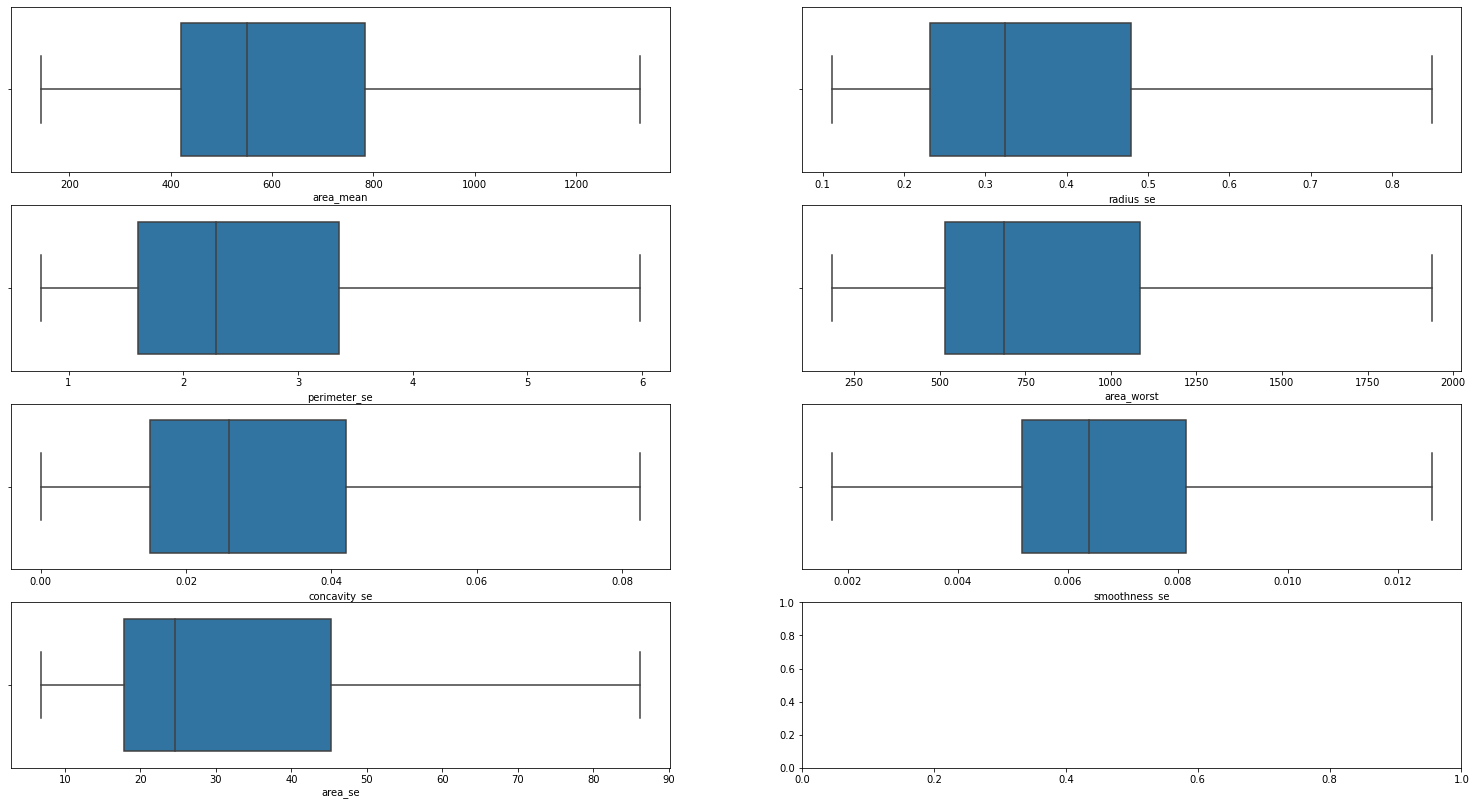

In [ ]:
fig, axs = plt.subplots(4,2, figsize = (26,14))
plt1 = sns.boxplot(data['area_mean'], ax = axs[0,0])
plt2 = sns.boxplot(data['radius_se'], ax = axs[0,1])
plt3 = sns.boxplot(data['perimeter_se'], ax = axs[1,0])
plt4 = sns.boxplot(data['area_worst'], ax = axs[1,1])
plt5 = sns.boxplot(data['concavity_se'], ax = axs[2,0])
plt6 = sns.boxplot(data['smoothness_se'], ax = axs[2,1])
plt7 = sns.boxplot(data['area_se'], ax = axs[3,0])


Shape of Malingant :  (212, 31)

Shape of Bengin :  (357, 31)


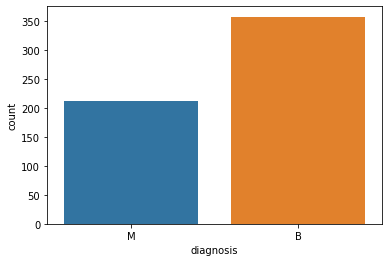

In [ ]:
Malingant = data[data['diagnosis']=='M']
Bengin = data[data['diagnosis']=='B']

print('Shape of Malingant : ', Malingant.shape)
print('\nShape of Bengin : ', Bengin.shape)

sns.countplot(data=data, x = 'diagnosis',label='Count')

conclusion: dataset contain approx 40% Malingant and approx 60% Bengin <br>
**This is not imbalanced dataset**

Label Encoding of 'diagnosis' column

In [ ]:
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# After Label encoding
# M: 1, B: 0
data.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,...,15.11,19.26,99.70,711.20,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259
236,1,23.210,26.97,153.50,1326.3,0.09509,0.16820,0.19500,0.12370,0.1909,...,31.01,34.51,206.00,1937.05,0.1481,0.4126,0.58200,0.25930,0.3103,0.08677
497,0,12.470,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,...,14.06,24.34,92.82,607.30,0.1276,0.2506,0.20280,0.10530,0.3035,0.07661
480,0,12.160,18.03,78.29,455.3,0.09087,0.07838,0.02916,0.01527,0.1464,...,13.34,27.87,88.83,547.40,0.1208,0.2279,0.16200,0.05690,0.2406,0.07729
520,0,9.295,13.90,59.96,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,...,10.57,17.84,67.84,326.60,0.1850,0.2097,0.09996,0.07262,0.3681,0.08982


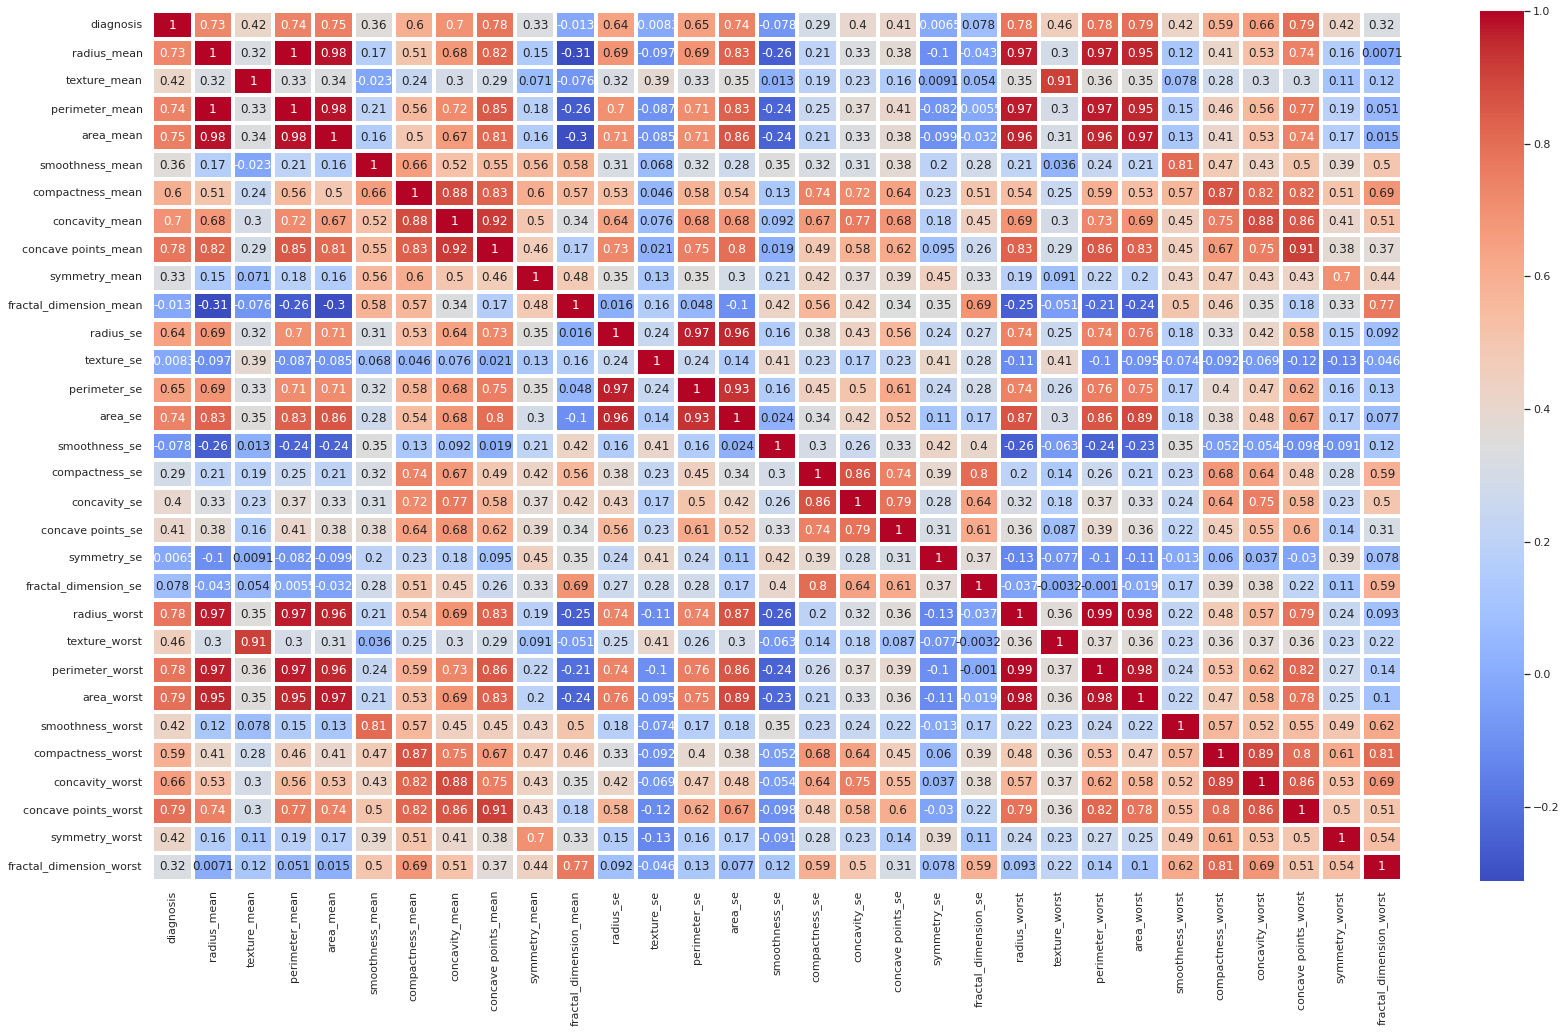

In [ ]:
sns.set(rc={'figure.figsize':(28, 16)})

# Correlation Heatmap
sns.heatmap(data.corr(), cmap="coolwarm", annot=True, linewidths=3)

* Correlation between radius_mean and perimeter_mean is 1
* Correlation between area_mean and radius_mean is 0.98
* Correlation between radius_mean and radius_worst is 0.98
* Correlation between area_worst and area_mean is 0.97
* Correlation between perimeter_worst and radius_mean is 0.95
* Correlation between perimeter_worst and area_mean is 0.96
* Correlation between area_worst and radius_mean is 0.95
* Correlation between radius_worst and area_mean is 0.96



In [ ]:
# droping Perimeter_mean, radius_worst, area_worst 
data.drop(['perimeter_mean', 'radius_worst', 'area_worst'], axis=1, inplace=True)
# After droping Perimeter_mean, radius_worst
data.sample(5)

,diagnosis,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.03003,0.006193,17.33,184.60,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
204,0,12.47,18.60,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,0.01782,0.003586,24.64,96.05,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
238,0,14.22,27.85,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,0.01185,0.003589,40.54,102.50,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796
216,0,11.89,18.35,432.2,0.09363,0.11540,0.06636,0.03142,0.1967,0.06314,...,0.02793,0.004775,27.10,86.20,0.1405,0.3046,0.2806,0.11380,0.3397,0.08365
534,0,10.96,17.62,365.6,0.09687,0.09752,0.05263,0.02788,0.1619,0.06408,...,0.01322,0.003534,26.51,76.43,0.1428,0.2510,0.2123,0.09861,0.2289,0.08278


## Split the dataset into train(80) and test(20) set

In [ ]:
# dependent variable: diagnosis
dependentVariable = 'diagnosis'

# store all independent variable in X and dependent variable in y
X = data.drop([dependentVariable], axis=1)
y = data[dependentVariable]

# splitting the dataset into train(80%) and test(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree
### Gini max_depth: 3

In [ ]:
# for Gini impurity
from sklearn.tree import DecisionTreeClassifier
giniImpurityClassifierMaxDepth3 = DecisionTreeClassifier(max_depth=3)
giniImpurityClassifierMaxDepth3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)


Acuracy of Decision tree for train set:  97.14285714285714

Classification Report for train case : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       286
           1       0.99      0.93      0.96       169

    accuracy                           0.97       455
   macro avg       0.98      0.96      0.97       455
weighted avg       0.97      0.97      0.97       455


Confusion Matrix for train case : 
 [[284   2]
 [ 11 158]]

Confusion Matrix Heatamp for train case: 


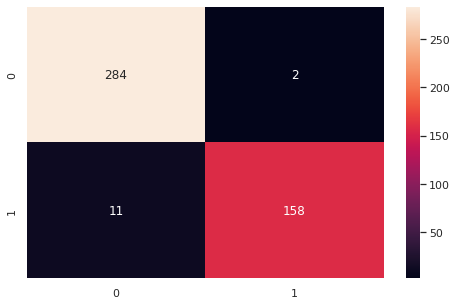

In [ ]:
plt.rcParams["figure.figsize"]=8,5
print("\nAcuracy of Decision tree for train set: ", accuracy_score(y_train, giniImpurityClassifierMaxDepth3.predict(X_train))*100)
print('\nClassification Report for train case : \n', classification_report(y_train, giniImpurityClassifierMaxDepth3.predict(X_train)))
print("\nConfusion Matrix for train case : \n", confusion_matrix(y_train, giniImpurityClassifierMaxDepth3.predict(X_train)))
print('\nConfusion Matrix Heatamp for train case: ')
sns.heatmap(confusion_matrix(y_train, giniImpurityClassifierMaxDepth3.predict(X_train)), annot=True, fmt='d')


Acuracy of Decision tree for test set:  94.73684210526315

Classification Report for test case : 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix for test case : 
 [[69  2]
 [ 4 39]]

Confusion Matrix Heatamp for test case: 


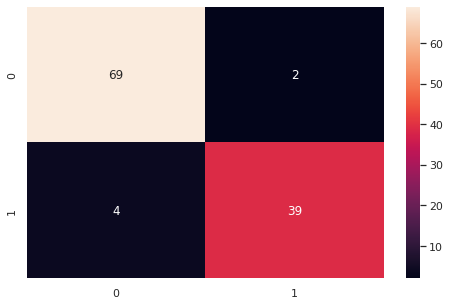

In [ ]:
print("\nAcuracy of Decision tree for test set: ", accuracy_score(y_test, giniImpurityClassifierMaxDepth3.predict(X_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, giniImpurityClassifierMaxDepth3.predict(X_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, giniImpurityClassifierMaxDepth3.predict(X_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, giniImpurityClassifierMaxDepth3.predict(X_test)), annot=True, fmt='d')

In [ ]:
GiniTrainResultmaxDepth3 = {"accuracy": accuracy_score(y_train, giniImpurityClassifierMaxDepth3.predict(X_train)),
               "F1_score": f1_score(y_train, giniImpurityClassifierMaxDepth3.predict(X_train), average='binary'),
               "precision": precision_score(y_train, giniImpurityClassifierMaxDepth3.predict(X_train), average='macro'),
                "recall": recall_score(y_train, giniImpurityClassifierMaxDepth3.predict(X_train), average='macro')}

GiniTestResultmaxDepth3 = {"accuracy": accuracy_score(y_test, giniImpurityClassifierMaxDepth3.predict(X_test)),
               "F1_score": f1_score(y_test, giniImpurityClassifierMaxDepth3.predict(X_test), average='binary'),
               "precision": precision_score(y_test, giniImpurityClassifierMaxDepth3.predict(X_test), average='macro'),
                "recall": recall_score(y_test, giniImpurityClassifierMaxDepth3.predict(X_test), average='macro')}

### Gini max_depth: 5

In [ ]:
giniImpurityClassifierMaxDepth5 = DecisionTreeClassifier(max_depth=5)
giniImpurityClassifierMaxDepth5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)


Acuracy of Decision tree for train set:  99.34065934065934

Classification Report for train case : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       286
           1       1.00      0.98      0.99       169

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455


Confusion Matrix for train case : 
 [[286   0]
 [  3 166]]

Confusion Matrix Heatamp for train case: 


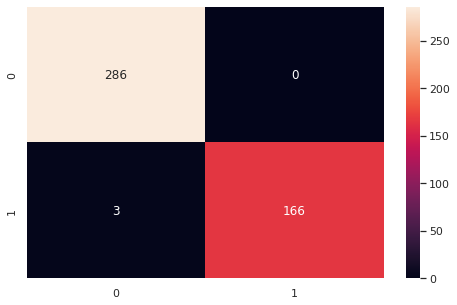

In [ ]:
plt.rcParams["figure.figsize"]=8,5
print("\nAcuracy of Decision tree for train set: ", accuracy_score(y_train, giniImpurityClassifierMaxDepth5.predict(X_train))*100)
print('\nClassification Report for train case : \n', classification_report(y_train, giniImpurityClassifierMaxDepth5.predict(X_train)))
print("\nConfusion Matrix for train case : \n", confusion_matrix(y_train, giniImpurityClassifierMaxDepth5.predict(X_train)))
print('\nConfusion Matrix Heatamp for train case: ')
sns.heatmap(confusion_matrix(y_train, giniImpurityClassifierMaxDepth5.predict(X_train)), annot=True, fmt='d')


Acuracy of Decision tree for test set:  92.98245614035088

Classification Report for test case : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114


Confusion Matrix for test case : 
 [[67  4]
 [ 4 39]]

Confusion Matrix Heatamp for test case: 


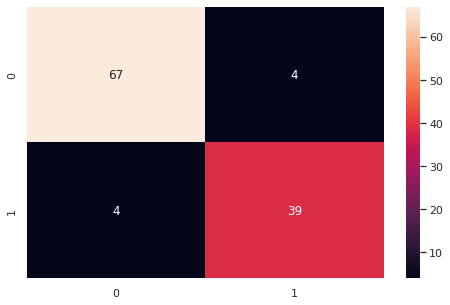

In [ ]:
print("\nAcuracy of Decision tree for test set: ", accuracy_score(y_test, giniImpurityClassifierMaxDepth5.predict(X_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, giniImpurityClassifierMaxDepth5.predict(X_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, giniImpurityClassifierMaxDepth5.predict(X_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, giniImpurityClassifierMaxDepth5.predict(X_test)), annot=True, fmt='d')

In [ ]:
GiniTrainResultmaxDepth5 = {"accuracy": accuracy_score(y_train, giniImpurityClassifierMaxDepth5.predict(X_train)),
               "F1_score": f1_score(y_train, giniImpurityClassifierMaxDepth5.predict(X_train), average='binary'),
               "precision": precision_score(y_train, giniImpurityClassifierMaxDepth5.predict(X_train), average='macro'),
                "recall": recall_score(y_train, giniImpurityClassifierMaxDepth5.predict(X_train), average='macro')}

GiniTestResultmaxDepth5 = {"accuracy": accuracy_score(y_test, giniImpurityClassifierMaxDepth5.predict(X_test)),
               "F1_score": f1_score(y_test, giniImpurityClassifierMaxDepth5.predict(X_test), average='binary'),
               "precision": precision_score(y_test, giniImpurityClassifierMaxDepth5.predict(X_test), average='macro'),
                "recall": recall_score(y_test, giniImpurityClassifierMaxDepth5.predict(X_test), average='macro')}

### Gini max_depth: 7

In [ ]:
giniImpurityClassifierMaxDepth7 = DecisionTreeClassifier(max_depth=7)
giniImpurityClassifierMaxDepth7.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)


Acuracy of Decision tree for train set:  99.78021978021978

Classification Report for train case : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      0.99      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455


Confusion Matrix for train case : 
 [[286   0]
 [  1 168]]

Confusion Matrix Heatamp for train case: 


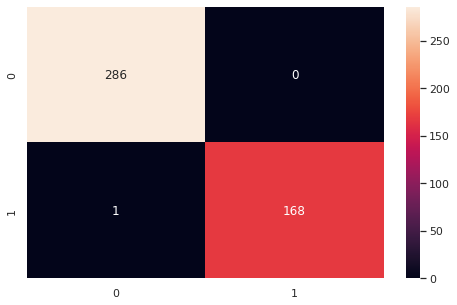

In [ ]:
plt.rcParams["figure.figsize"]=8,5
print("\nAcuracy of Decision tree for train set: ", accuracy_score(y_train, giniImpurityClassifierMaxDepth7.predict(X_train))*100)
print('\nClassification Report for train case : \n', classification_report(y_train, giniImpurityClassifierMaxDepth7.predict(X_train)))
print("\nConfusion Matrix for train case : \n", confusion_matrix(y_train, giniImpurityClassifierMaxDepth7.predict(X_train)))
print('\nConfusion Matrix Heatamp for train case: ')
sns.heatmap(confusion_matrix(y_train, giniImpurityClassifierMaxDepth7.predict(X_train)), annot=True, fmt='d')


Acuracy of Decision tree for test set:  93.85964912280701

Classification Report for test case : 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


Confusion Matrix for test case : 
 [[68  3]
 [ 4 39]]

Confusion Matrix Heatamp for test case: 


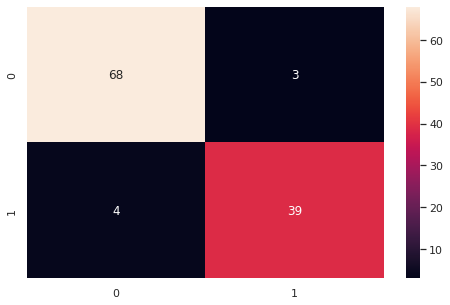

In [ ]:
print("\nAcuracy of Decision tree for test set: ", accuracy_score(y_test, giniImpurityClassifierMaxDepth7.predict(X_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, giniImpurityClassifierMaxDepth7.predict(X_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, giniImpurityClassifierMaxDepth7.predict(X_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, giniImpurityClassifierMaxDepth7.predict(X_test)), annot=True, fmt='d')

In [ ]:
GiniTrainResultmaxDepth7 = {"accuracy": accuracy_score(y_train, giniImpurityClassifierMaxDepth7.predict(X_train)),
               "F1_score": f1_score(y_train, giniImpurityClassifierMaxDepth7.predict(X_train), average='binary'),
               "precision": precision_score(y_train, giniImpurityClassifierMaxDepth7.predict(X_train), average='macro'),
                "recall": recall_score(y_train, giniImpurityClassifierMaxDepth7.predict(X_train), average='macro')}

GiniTestResultmaxDepth7 = {"accuracy": accuracy_score(y_test, giniImpurityClassifierMaxDepth7.predict(X_test)),
               "F1_score": f1_score(y_test, giniImpurityClassifierMaxDepth7.predict(X_test), average='binary'),
               "precision": precision_score(y_test, giniImpurityClassifierMaxDepth7.predict(X_test), average='macro'),
                "recall": recall_score(y_test, giniImpurityClassifierMaxDepth7.predict(X_test), average='macro')}

### Comaprision for gini different max_depth(3, 5, 7)

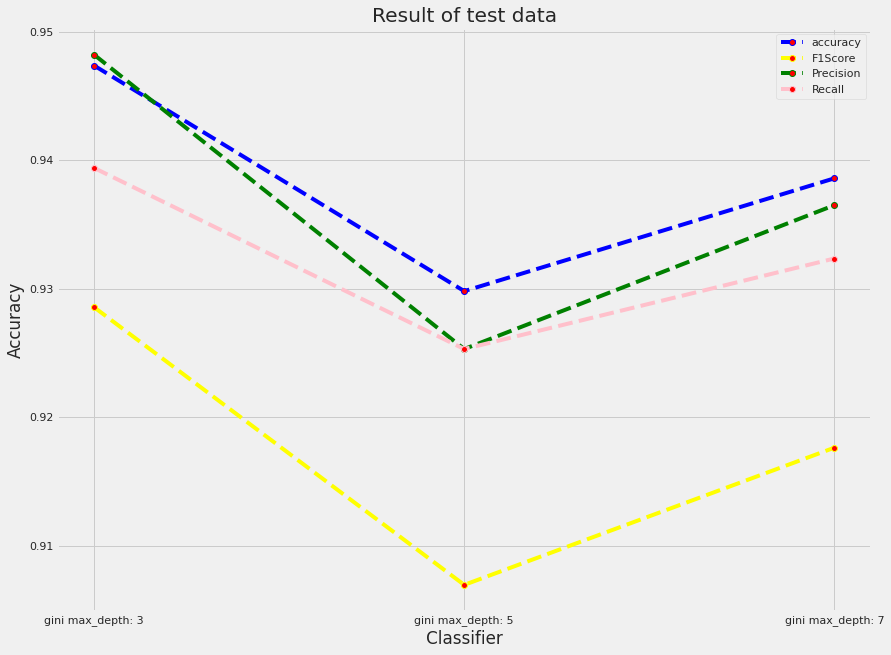

In [ ]:
classifierTestResult = [GiniTestResultmaxDepth3, GiniTestResultmaxDepth5, GiniTestResultmaxDepth7]

classifierTestAccuracy = [x['accuracy'] for x in classifierTestResult]                        
classifierTestF1Score = [x['F1_score'] for x in classifierTestResult]
classifierTestPrecision = [x['precision'] for x in classifierTestResult]
classifierTestRecall = [x['recall'] for x in classifierTestResult]

classifierName = ['gini max_depth: 3', 'gini max_depth: 5', 'gini max_depth: 7']
plt.rcParams["figure.figsize"]=13,10

plt.style.use('fivethirtyeight')

plt.plot(classifierName, classifierTestAccuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red', label="accuracy")    
plt.plot(classifierName, classifierTestF1Score, color='yellow',linestyle='dashed', marker='o', markerfacecolor='red', label="F1Score")
plt.plot(classifierName, classifierTestPrecision, color='green',linestyle='dashed', marker='o', markerfacecolor='red', label="Precision")
plt.plot(classifierName, classifierTestRecall, color='pink',linestyle='dashed', marker='o', markerfacecolor='red', label="Recall")

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title("Result of test data")
plt.legend()
plt.show()

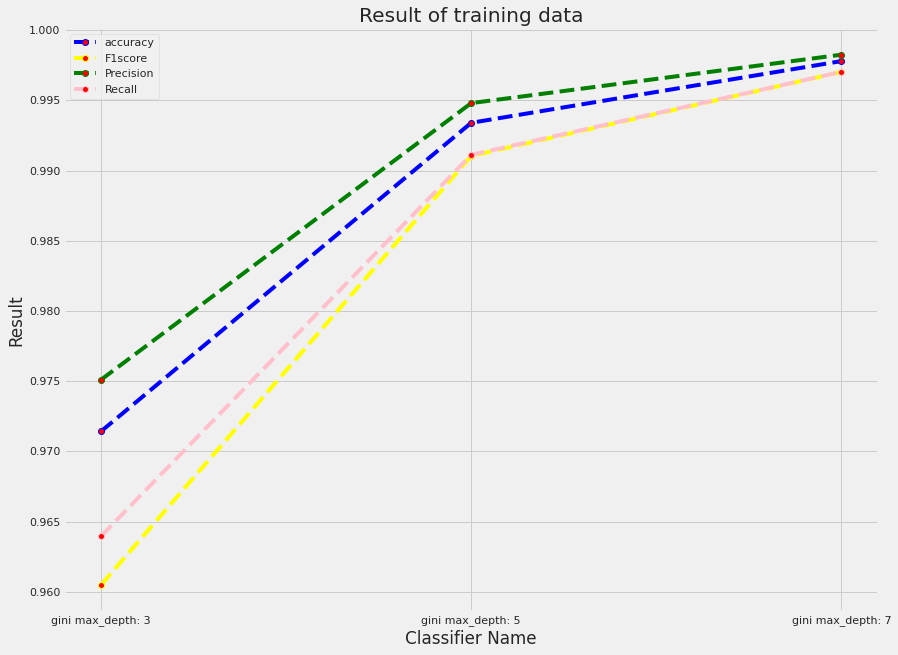

In [ ]:
classifierTrainResult = [GiniTrainResultmaxDepth3, GiniTrainResultmaxDepth5, GiniTrainResultmaxDepth7]

classifierName = ['gini max_depth: 3', 'gini max_depth: 5', 'gini max_depth: 7']

classifierTrainAccuracy = [x['accuracy'] for x in classifierTrainResult]                        
classifierTrainF1Score = [x['F1_score'] for x in classifierTrainResult]
classifierTrainPrecision = [x['precision'] for x in classifierTrainResult]
classifierTrainRecall = [x['recall'] for x in classifierTrainResult]

plt.rcParams["figure.figsize"]=13,10

plt.style.use('fivethirtyeight')

plt.plot(classifierName, classifierTrainAccuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red', label="accuracy")    
plt.plot(classifierName, classifierTrainF1Score, color='yellow',linestyle='dashed', marker='o', markerfacecolor='red', label="F1score")
plt.plot(classifierName, classifierTrainPrecision, color='green',linestyle='dashed', marker='o', markerfacecolor='red', label="Precision")
plt.plot(classifierName, classifierTrainRecall, color='pink',linestyle='dashed', marker='o', markerfacecolor='red', label="Recall")

plt.xlabel('Classifier Name')
plt.ylabel('Result')
plt.title("Result of training data")
plt.legend()
plt.show()

**conclusion: for Gini when max_depth: 5 classifier gives maximum recall for both train and test set**

### Entropy max_depth: 3

In [ ]:
entropyClassifierMaxDepth3 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
entropyClassifierMaxDepth3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)


Acuracy of Decision tree for train set:  96.92307692307692

Classification Report for train case : 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       286
           1       0.94      0.98      0.96       169

    accuracy                           0.97       455
   macro avg       0.96      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455


Confusion Matrix for train case : 
 [[276  10]
 [  4 165]]

Confusion Matrix Heatamp for train case: 


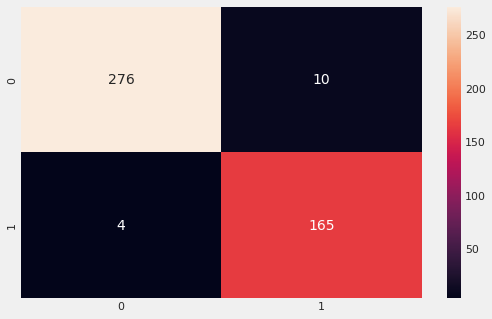

In [ ]:
plt.rcParams["figure.figsize"]=8,5
print("\nAcuracy of Decision tree for train set: ", accuracy_score(y_train, entropyClassifierMaxDepth3.predict(X_train))*100)
print('\nClassification Report for train case : \n', classification_report(y_train, entropyClassifierMaxDepth3.predict(X_train)))
print("\nConfusion Matrix for train case : \n", confusion_matrix(y_train, entropyClassifierMaxDepth3.predict(X_train)))
print('\nConfusion Matrix Heatamp for train case: ')
sns.heatmap(confusion_matrix(y_train, entropyClassifierMaxDepth3.predict(X_train)), annot=True, fmt='d')


Acuracy of Decision tree for test set:  94.73684210526315

Classification Report for test case : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix for test case : 
 [[68  3]
 [ 3 40]]

Confusion Matrix Heatamp for test case: 


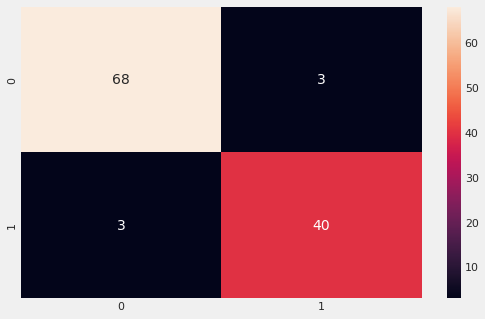

In [ ]:
print("\nAcuracy of Decision tree for test set: ", accuracy_score(y_test, entropyClassifierMaxDepth3.predict(X_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, entropyClassifierMaxDepth3.predict(X_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, entropyClassifierMaxDepth3.predict(X_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, entropyClassifierMaxDepth3.predict(X_test)), annot=True, fmt='d')

In [ ]:
EntropyTrainResultMaxDepth3 = {"accuracy": accuracy_score(y_train, entropyClassifierMaxDepth3.predict(X_train)),
               "F1_score": f1_score(y_train, entropyClassifierMaxDepth3.predict(X_train), average='binary'),
               "precision": precision_score(y_train, entropyClassifierMaxDepth3.predict(X_train), average='macro'),
                "recall": recall_score(y_train, entropyClassifierMaxDepth3.predict(X_train), average='macro')}

EntropyTestResultMaxDepth3 = {"accuracy": accuracy_score(y_test, entropyClassifierMaxDepth3.predict(X_test)),
               "F1_score": f1_score(y_test, entropyClassifierMaxDepth3.predict(X_test), average='binary'),
               "precision": precision_score(y_test, entropyClassifierMaxDepth3.predict(X_test), average='macro'),
                "recall": recall_score(y_test, entropyClassifierMaxDepth3.predict(X_test), average='macro')}

### entropy max_depth: 5

In [ ]:
entropyClassifierMaxDepth5 = DecisionTreeClassifier(criterion="entropy", max_depth=5)
entropyClassifierMaxDepth5.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)


Acuracy of Decision tree for train set:  100.0

Classification Report for train case : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455


Confusion Matrix for train case : 
 [[286   0]
 [  0 169]]

Confusion Matrix Heatamp for train case: 


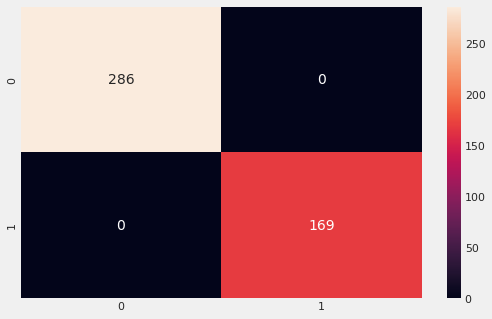

In [ ]:
plt.rcParams["figure.figsize"]=8,5
print("\nAcuracy of Decision tree for train set: ", accuracy_score(y_train, entropyClassifierMaxDepth5.predict(X_train))*100)
print('\nClassification Report for train case : \n', classification_report(y_train, entropyClassifierMaxDepth5.predict(X_train)))
print("\nConfusion Matrix for train case : \n", confusion_matrix(y_train, entropyClassifierMaxDepth5.predict(X_train)))
print('\nConfusion Matrix Heatamp for train case: ')
sns.heatmap(confusion_matrix(y_train, entropyClassifierMaxDepth5.predict(X_train)), annot=True, fmt='d')


Acuracy of Decision tree for test set:  92.98245614035088

Classification Report for test case : 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


Confusion Matrix for test case : 
 [[68  3]
 [ 5 38]]

Confusion Matrix Heatamp for test case: 


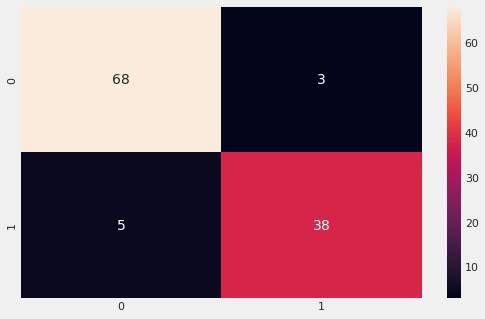

In [ ]:
print("\nAcuracy of Decision tree for test set: ", accuracy_score(y_test, entropyClassifierMaxDepth5.predict(X_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, entropyClassifierMaxDepth5.predict(X_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, entropyClassifierMaxDepth5.predict(X_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, entropyClassifierMaxDepth5.predict(X_test)), annot=True, fmt='d')

In [ ]:
EntropyTrainResultMaxDepth5 = {"accuracy": accuracy_score(y_train, entropyClassifierMaxDepth5.predict(X_train)),
               "F1_score": f1_score(y_train, entropyClassifierMaxDepth5.predict(X_train), average='binary'),
               "precision": precision_score(y_train, entropyClassifierMaxDepth5.predict(X_train), average='macro'),
                "recall": recall_score(y_train, entropyClassifierMaxDepth5.predict(X_train), average='macro')}

EntropyTestResultMaxDepth5 = {"accuracy": accuracy_score(y_test, entropyClassifierMaxDepth5.predict(X_test)),
               "F1_score": f1_score(y_test, entropyClassifierMaxDepth5.predict(X_test), average='binary'),
               "precision": precision_score(y_test, entropyClassifierMaxDepth5.predict(X_test), average='macro'),
                "recall": recall_score(y_test, entropyClassifierMaxDepth5.predict(X_test), average='macro')}

### entropy max_depth: 7

In [ ]:
entropyClassifierMaxDepth7 = DecisionTreeClassifier(criterion="entropy", max_depth=7)
entropyClassifierMaxDepth7.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)


Acuracy of Decision tree for train set:  100.0

Classification Report for train case : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455


Confusion Matrix for train case : 
 [[286   0]
 [  0 169]]

Confusion Matrix Heatamp for train case: 


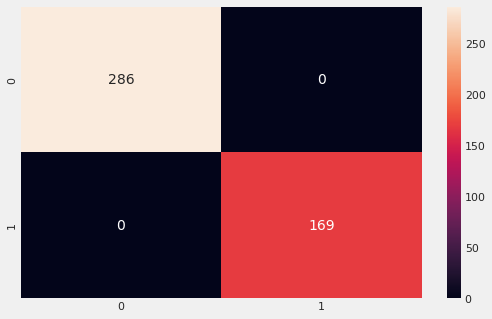

In [ ]:
plt.rcParams["figure.figsize"]=8,5
print("\nAcuracy of Decision tree for train set: ", accuracy_score(y_train, entropyClassifierMaxDepth7.predict(X_train))*100)
print('\nClassification Report for train case : \n', classification_report(y_train, entropyClassifierMaxDepth7.predict(X_train)))
print("\nConfusion Matrix for train case : \n", confusion_matrix(y_train, entropyClassifierMaxDepth7.predict(X_train)))
print('\nConfusion Matrix Heatamp for train case: ')
sns.heatmap(confusion_matrix(y_train, entropyClassifierMaxDepth7.predict(X_train)), annot=True, fmt='d')


Acuracy of Decision tree for test set:  93.85964912280701

Classification Report for test case : 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


Confusion Matrix for test case : 
 [[68  3]
 [ 4 39]]

Confusion Matrix Heatamp for test case: 


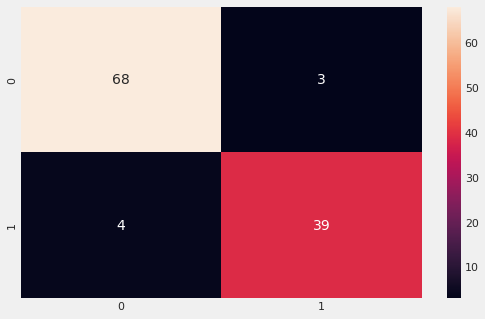

In [ ]:
print("\nAcuracy of Decision tree for test set: ", accuracy_score(y_test, entropyClassifierMaxDepth7.predict(X_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, entropyClassifierMaxDepth7.predict(X_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, entropyClassifierMaxDepth7.predict(X_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, entropyClassifierMaxDepth7.predict(X_test)), annot=True, fmt='d')

In [ ]:
EntropyTrainResultMaxDepth7 = {"accuracy": accuracy_score(y_train, entropyClassifierMaxDepth3.predict(X_train)),
               "F1_score": f1_score(y_train, entropyClassifierMaxDepth3.predict(X_train), average='binary'),
               "precision": precision_score(y_train, entropyClassifierMaxDepth3.predict(X_train), average='macro'),
                "recall": recall_score(y_train, entropyClassifierMaxDepth3.predict(X_train), average='macro')}

EntropyTestResultMaxDepth7 = {"accuracy": accuracy_score(y_test, entropyClassifierMaxDepth3.predict(X_test)),
               "F1_score": f1_score(y_test, entropyClassifierMaxDepth3.predict(X_test), average='binary'),
               "precision": precision_score(y_test, entropyClassifierMaxDepth3.predict(X_test), average='macro'),
                "recall": recall_score(y_test, entropyClassifierMaxDepth3.predict(X_test), average='macro')}

### Comaprision of entropy with different max_depth value(3, 5, 7)

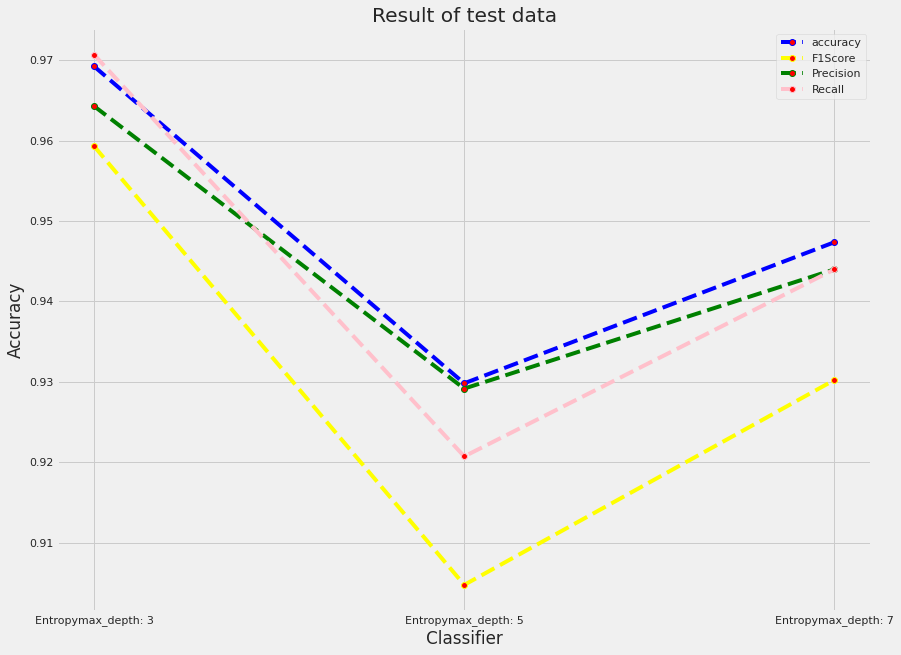

In [ ]:
classifierTestResult = [EntropyTrainResultMaxDepth3, EntropyTestResultMaxDepth5, EntropyTestResultMaxDepth7]

classifierTestAccuracy = [x['accuracy'] for x in classifierTestResult]                        
classifierTestF1Score = [x['F1_score'] for x in classifierTestResult]
classifierTestPrecision = [x['precision'] for x in classifierTestResult]
classifierTestRecall = [x['recall'] for x in classifierTestResult]

classifierName = ['Entropymax_depth: 3', 'Entropymax_depth: 5', 'Entropymax_depth: 7']
plt.rcParams["figure.figsize"]=13,10

plt.style.use('fivethirtyeight')

plt.plot(classifierName, classifierTestAccuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red', label="accuracy")    
plt.plot(classifierName, classifierTestF1Score, color='yellow',linestyle='dashed', marker='o', markerfacecolor='red', label="F1Score")
plt.plot(classifierName, classifierTestPrecision, color='green',linestyle='dashed', marker='o', markerfacecolor='red', label="Precision")
plt.plot(classifierName, classifierTestRecall, color='pink',linestyle='dashed', marker='o', markerfacecolor='red', label="Recall")

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title("Result of test data")
plt.legend()
plt.show()

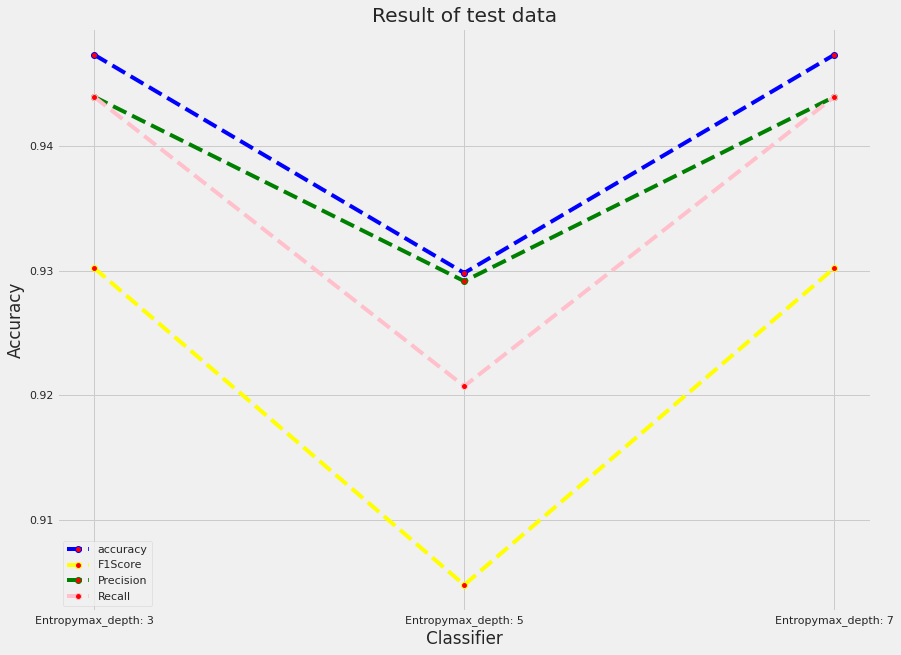

In [ ]:
classifierTestResult = [EntropyTestResultMaxDepth3, EntropyTestResultMaxDepth5, EntropyTestResultMaxDepth7]

classifierTestAccuracy = [x['accuracy'] for x in classifierTestResult]                        
classifierTestF1Score = [x['F1_score'] for x in classifierTestResult]
classifierTestPrecision = [x['precision'] for x in classifierTestResult]
classifierTestRecall = [x['recall'] for x in classifierTestResult]

classifierName = ['Entropymax_depth: 3', 'Entropymax_depth: 5', 'Entropymax_depth: 7']
plt.rcParams["figure.figsize"]=13,10

plt.style.use('fivethirtyeight')

plt.plot(classifierName, classifierTestAccuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red', label="accuracy")    
plt.plot(classifierName, classifierTestF1Score, color='yellow',linestyle='dashed', marker='o', markerfacecolor='red', label="F1Score")
plt.plot(classifierName, classifierTestPrecision, color='green',linestyle='dashed', marker='o', markerfacecolor='red', label="Precision")
plt.plot(classifierName, classifierTestRecall, color='pink',linestyle='dashed', marker='o', markerfacecolor='red', label="Recall")

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title("Result of test data")
plt.legend()
plt.show()

**Conclusion: max_depth: 5 entropy gives maxmium Recall for test data**

## KNN

In [ ]:
neighbors = [i for i in range(1,21)]
accuracy=[]
for k in neighbors:    
    Knn_classifier = KNeighborsClassifier(n_neighbors=k)
    Knn_classifier.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test, Knn_classifier.predict(X_test))*100)

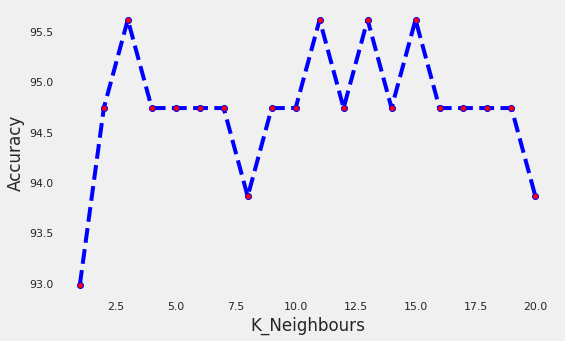

In [ ]:
plt.rcParams["figure.figsize"]=8,5
plt.plot(neighbors, accuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red')    
plt.xlabel('K_Neighbours')
plt.ylabel('Accuracy')
plt.grid()
# conclusion: when k=11 classfiier gives maximum accuracy

In [ ]:
KnnClassifier = KNeighborsClassifier(n_neighbors=11)
KnnClassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)


Acuracy of KNN classifier for test set:  95.6140350877193

Classification Report for test case : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix for test case : 
 [[71  0]
 [ 5 38]]

Confusion Matrix Heatamp for test case: 


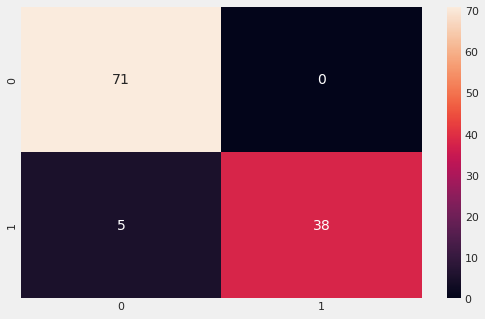

In [ ]:
print("\nAcuracy of KNN classifier for test set: ", accuracy_score(y_test, KnnClassifier.predict(X_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, KnnClassifier.predict(X_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, KnnClassifier.predict(X_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, KnnClassifier.predict(X_test)), annot=True, fmt='d')

Acuracy of KNN classifier for train set:  90.76923076923077

Classification Report for train set : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       286
           1       0.93      0.81      0.87       169

    accuracy                           0.91       455
   macro avg       0.91      0.89      0.90       455
weighted avg       0.91      0.91      0.91       455


Confusion Matrix for train set : 
 [[276  10]
 [ 32 137]]

Confusion Matrix Heatamp for train set: 


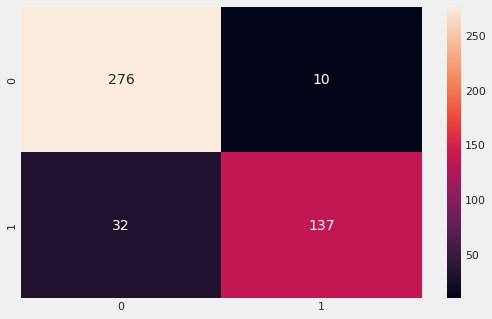

In [ ]:
print("Acuracy of KNN classifier for train set: ", accuracy_score(y_train, KnnClassifier.predict(X_train))*100)
print('\nClassification Report for train set : \n', classification_report(y_train, KnnClassifier.predict(X_train)))
print("\nConfusion Matrix for train set : \n", confusion_matrix(y_train, KnnClassifier.predict(X_train)))
print('\nConfusion Matrix Heatamp for train set: ')
sns.heatmap(confusion_matrix(y_train, KnnClassifier.predict(X_train)), annot=True, fmt='d')

In [ ]:
knnClassifierTrainResult = {"accuracy": accuracy_score(y_train, KnnClassifier.predict(X_train)),
               "F1_score": f1_score(y_train, KnnClassifier.predict(X_train), average='binary'),
               "precision": precision_score(y_train, KnnClassifier.predict(X_train), average='macro'),
                "recall": recall_score(y_train, KnnClassifier.predict(X_train), average='macro')}

knnClassifierTestResult = {"accuracy": accuracy_score(y_test, KnnClassifier.predict(X_test)),
               "F1_score": f1_score(y_test, KnnClassifier.predict(X_test), average='binary'),
               "precision": precision_score(y_test, KnnClassifier.predict(X_test), average='macro'),
                "recall": recall_score(y_test, KnnClassifier.predict(X_test), average='macro')}

## LogisticRegression

In [ ]:
logisClassifier = LogisticRegression(max_iter=10000)
logisClassifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Acuracy of logistic regression for test set:  96.49122807017544
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix : 
 [[70  1]
 [ 3 40]]

Confusion Matrix heatmap : 


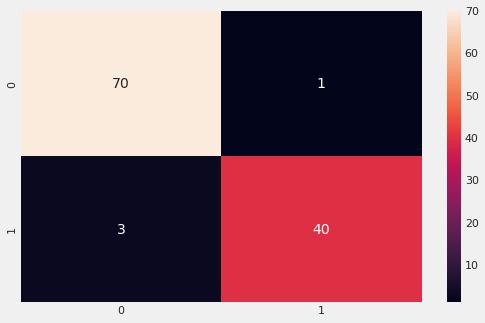

In [ ]:
print("Acuracy of logistic regression for test set: ", accuracy_score(y_test, logisClassifier.predict(X_test))*100)
print('Classification Report : \n', classification_report(y_test, logisClassifier.predict(X_test)))
print("Confusion Matrix : \n", confusion_matrix(y_test, logisClassifier.predict(X_test)))
print('\nConfusion Matrix heatmap : ')
sns.heatmap(confusion_matrix(y_test, logisClassifier.predict(X_test)), annot=True, fmt='d')

Acuracy of Logistic classifier for train set:  95.6043956043956

Classification Report for train set : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       286
           1       0.95      0.93      0.94       169

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.95       455
weighted avg       0.96      0.96      0.96       455


Confusion Matrix for train set : 
 [[278   8]
 [ 12 157]]

Confusion Matrix Heatamp for train set: 


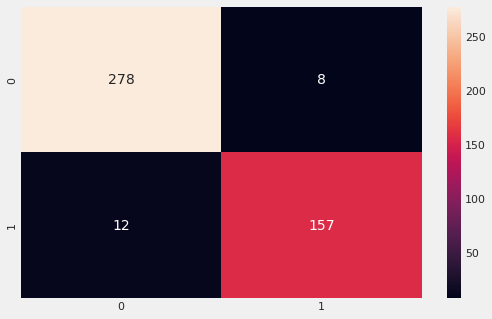

In [ ]:
print("Acuracy of Logistic classifier for train set: ", accuracy_score(y_train, logisClassifier.predict(X_train))*100)
print('\nClassification Report for train set : \n', classification_report(y_train, logisClassifier.predict(X_train)))
print("\nConfusion Matrix for train set : \n", confusion_matrix(y_train, logisClassifier.predict(X_train)))
print('\nConfusion Matrix Heatamp for train set: ')
sns.heatmap(confusion_matrix(y_train, logisClassifier.predict(X_train)), annot=True, fmt='d')

In [ ]:
logisClassifierTrainResult = {"accuracy": accuracy_score(y_train, logisClassifier.predict(X_train)),
               "F1_score": f1_score(y_train, logisClassifier.predict(X_train), average='binary'),
               "precision": precision_score(y_train, logisClassifier.predict(X_train), average='macro'),
                "recall": recall_score(y_train, logisClassifier.predict(X_train), average='macro')}

logisClassifierTestResult = {"accuracy": accuracy_score(y_test, logisClassifier.predict(X_test)),
               "F1_score": f1_score(y_test, logisClassifier.predict(X_test), average='binary'),
               "precision": precision_score(y_test, logisClassifier.predict(X_test), average='macro'),
                "recall": recall_score(y_test, logisClassifier.predict(X_test), average='macro')}

## SVM

In [ ]:
from sklearn.svm import SVC
kernals = ['rbf', 'poly', 'linear']
accuracy = []
for i in kernals:
    svm_classifier = SVC(C=1.7, kernel=i, random_state=5)
    svm_classifier.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test, svm_classifier.predict(X_test))*100)

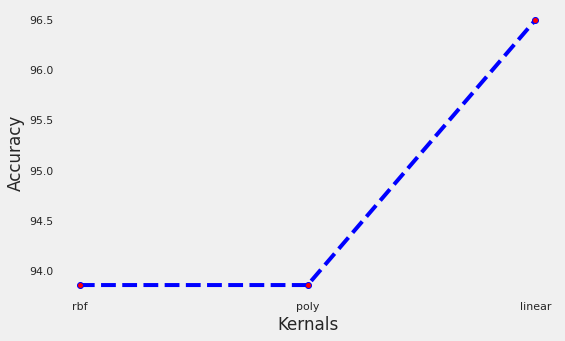

In [ ]:
plt.plot(kernals, accuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red')    
plt.xlabel('Kernals')
plt.ylabel('Accuracy')
plt.grid()
# conclusion when kernal = linear classifier gives maximum

In [ ]:
svmClassifier = SVC(C=1.5, kernel='linear', probability=True)
svmClassifier.fit(X_train, y_train)

SVC(C=1.5, kernel='linear', probability=True)


Acuracy of SVM classifier for test set:  96.49122807017544

Classification Report for test case : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix for test case : 
 [[70  1]
 [ 3 40]]

Confusion Matrix Heatamp for test case: 


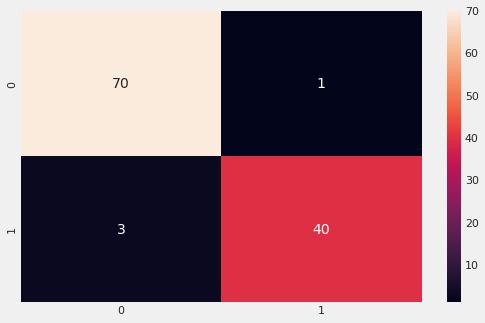

In [ ]:
print("\nAcuracy of SVM classifier for test set: ", accuracy_score(y_test, svmClassifier.predict(X_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, svmClassifier.predict(X_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, svmClassifier.predict(X_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, svmClassifier.predict(X_test)), annot=True, fmt='d')

Acuracy of SVM classifier for train set:  96.04395604395604

Classification Report for train set : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       286
           1       0.96      0.93      0.95       169

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.96       455
weighted avg       0.96      0.96      0.96       455


Confusion Matrix for train set : 
 [[280   6]
 [ 12 157]]

Confusion Matrix Heatamp for train set: 


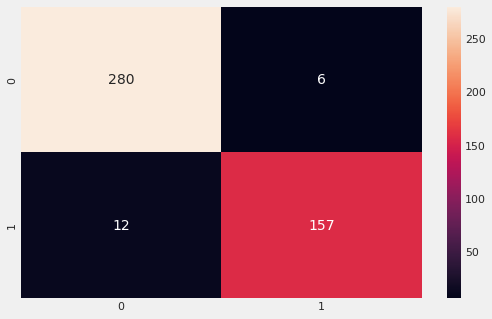

In [ ]:
print("Acuracy of SVM classifier for train set: ", accuracy_score(y_train, svmClassifier.predict(X_train))*100)
print('\nClassification Report for train set : \n', classification_report(y_train, svmClassifier.predict(X_train)))
print("\nConfusion Matrix for train set : \n", confusion_matrix(y_train, svmClassifier.predict(X_train)))
print('\nConfusion Matrix Heatamp for train set: ')
sns.heatmap(confusion_matrix(y_train, svmClassifier.predict(X_train)), annot=True, fmt='d')

In [ ]:
svmClassifierTrainResult = {"accuracy": accuracy_score(y_train, svmClassifier.predict(X_train)),
               "F1_score": f1_score(y_train, svmClassifier.predict(X_train), average='binary'),
               "precision": precision_score(y_train, svmClassifier.predict(X_train), average='macro'),
                "recall": recall_score(y_train, svmClassifier.predict(X_train), average='macro')}

svmClassifierTestResult = {"accuracy": accuracy_score(y_test, svmClassifier.predict(X_test)),
               "F1_score": f1_score(y_test, svmClassifier.predict(X_test), average='binary'),
               "precision": precision_score(y_test, svmClassifier.predict(X_test), average='macro'),
                "recall": recall_score(y_test, svmClassifier.predict(X_test), average='macro')}

## Comapre the result for all classifier
### For test set

In [ ]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Classifier Name", "Accuracy", "F1 Score", "Precision", "Recall"]) 

GiniTestmaxDepth3 = list(GiniTestResultmaxDepth3.values())
GiniTestmaxDepth3.insert(0, "Gini max_depth:3")

GiniTestmaxDepth5 = list(GiniTestResultmaxDepth5.values())
GiniTestmaxDepth5.insert(0, "Gini max_depth:5")

GiniTestmaxDepth7 = list(GiniTestResultmaxDepth7.values())
GiniTestmaxDepth7.insert(0, "Gini max_depth:7")

entropyTestmaxDepth3 = list(EntropyTestResultMaxDepth3.values())
entropyTestmaxDepth3.insert(0, "Entropy max_depth:3")

entropyTestmaxDepth5 = list(EntropyTestResultMaxDepth5.values())
entropyTestmaxDepth5.insert(0, "Entropy max_depth:5")

entropyTestmaxDepth7 = list(EntropyTestResultMaxDepth7.values())
entropyTestmaxDepth7.insert(0, "Entropy max_depth:7")

KnnTest = list(knnClassifierTestResult.values())
KnnTest.insert(0, "KNN")

logisticTest = list(logisClassifierTestResult.values())
logisticTest.insert(0, "Logistic Regression")

SvmTest = list(svmClassifierTestResult.values())
SvmTest.insert(0, "SVM")


# Add rows 
myTable.add_row(GiniTestmaxDepth3) 
myTable.add_row(GiniTestmaxDepth5)
myTable.add_row(GiniTestmaxDepth7)
myTable.add_row(entropyTestmaxDepth3) 
myTable.add_row(entropyTestmaxDepth5) 
myTable.add_row(entropyTestmaxDepth7)
myTable.add_row(KnnTest)
myTable.add_row(logisticTest) 
myTable.add_row(SvmTest)

print(myTable)

+---------------------+--------------------+--------------------+--------------------+--------------------+
|   Classifier Name   |      Accuracy      |      F1 Score      |     Precision      |       Recall       |
+---------------------+--------------------+--------------------+--------------------+--------------------+
|   Gini max_depth:3  | 0.9473684210526315 | 0.9285714285714286 | 0.9482124958235884 | 0.9394038650507697 |
|   Gini max_depth:5  | 0.9298245614035088 | 0.9069767441860465 | 0.9253193580085162 | 0.9253193580085162 |
|   Gini max_depth:7  | 0.9385964912280702 | 0.9176470588235294 | 0.9365079365079365 | 0.9323616115296429 |
| Entropy max_depth:3 | 0.9473684210526315 | 0.9302325581395349 | 0.9439895185063871 | 0.9439895185063871 |
| Entropy max_depth:5 | 0.9298245614035088 | 0.9047619047619047 | 0.9291680588038758 | 0.9207337045528987 |
| Entropy max_depth:7 | 0.9473684210526315 | 0.9302325581395349 | 0.9439895185063871 | 0.9439895185063871 |
|         KNN         | 0.95

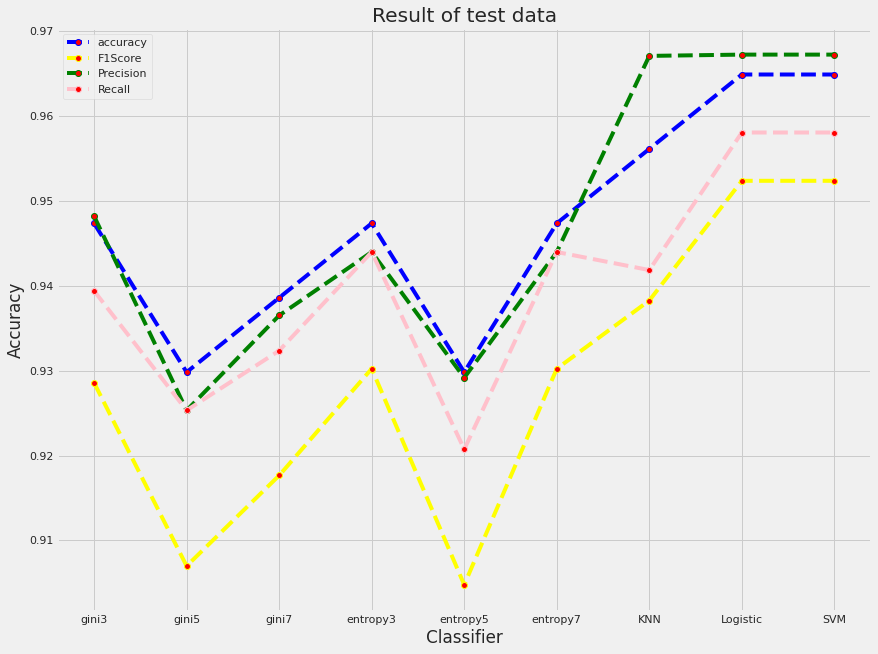

In [ ]:
classifierTestResult = [GiniTestResultmaxDepth3, GiniTestResultmaxDepth5, GiniTestResultmaxDepth7, EntropyTestResultMaxDepth3, EntropyTestResultMaxDepth5, EntropyTestResultMaxDepth7,
                        knnClassifierTestResult, logisClassifierTestResult, svmClassifierTestResult]

classifierName = ['gini3', 'gini5', 'gini7', 'entropy3', 'entropy5', 'entropy7', 'KNN', 'Logistic', 'SVM']

classifierTestAccuracy = [x['accuracy'] for x in classifierTestResult]                        
classifierTestF1Score = [x['F1_score'] for x in classifierTestResult]
classifierTestPrecision = [x['precision'] for x in classifierTestResult]
classifierTestRecall = [x['recall'] for x in classifierTestResult]

plt.rcParams["figure.figsize"]=13,10

plt.style.use('fivethirtyeight')

plt.plot(classifierName, classifierTestAccuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red', label="accuracy")    
plt.plot(classifierName, classifierTestF1Score, color='yellow',linestyle='dashed', marker='o', markerfacecolor='red', label="F1Score")
plt.plot(classifierName, classifierTestPrecision, color='green',linestyle='dashed', marker='o', markerfacecolor='red', label="Precision")
plt.plot(classifierName, classifierTestRecall, color='pink',linestyle='dashed', marker='o', markerfacecolor='red', label="Recall")

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title("Result of test data")
plt.legend()
plt.show()

**Conclusion: For test set SVM gives maximum recall**

### For train set

In [ ]:
myTable = PrettyTable(["Classifier Name", "Accuracy", "F1 Score", "Precision", "Recall"]) 

GiniTrainmaxDepth3 = list(GiniTrainResultmaxDepth3.values())
GiniTrainmaxDepth3.insert(0, "Gini max_depth:3")

GiniTrainmaxDepth5 = list(GiniTrainResultmaxDepth5.values())
GiniTrainmaxDepth5.insert(0, "Gini max_depth:5")

GiniTrainmaxDepth7 = list(GiniTrainResultmaxDepth7.values())
GiniTrainmaxDepth7.insert(0, "Gini max_depth:7")

entropyTrainmaxDepth3 = list(EntropyTrainResultMaxDepth3.values())
entropyTrainmaxDepth3.insert(0, "Entropy max_depth:3")

entropyTrainmaxDepth5 = list(EntropyTrainResultMaxDepth5.values())
entropyTrainmaxDepth5.insert(0, "Entropy max_depth:5")

entropyTrainmaxDepth7 = list(EntropyTrainResultMaxDepth7.values())
entropyTrainmaxDepth7.insert(0, "Entropy max_depth:7")

KnnTrain = list(knnClassifierTrainResult.values())
KnnTrain.insert(0, "KNN")

logisticTrain = list(logisClassifierTrainResult.values())
logisticTrain.insert(0, "Logistic Regression")

SvmTrain = list(svmClassifierTrainResult.values())
SvmTrain.insert(0, "SVM")


# Add rows 
myTable.add_row(GiniTrainmaxDepth3) 
myTable.add_row(GiniTrainmaxDepth5) 
myTable.add_row(GiniTrainmaxDepth7)
myTable.add_row(entropyTrainmaxDepth3) 
myTable.add_row(entropyTrainmaxDepth5) 
myTable.add_row(entropyTrainmaxDepth7)
myTable.add_row(KnnTrain)
myTable.add_row(logisticTrain) 
myTable.add_row(SvmTrain)

print(myTable)

+---------------------+--------------------+--------------------+--------------------+--------------------+
|   Classifier Name   |      Accuracy      |      F1 Score      |     Precision      |       Recall       |
+---------------------+--------------------+--------------------+--------------------+--------------------+
|   Gini max_depth:3  | 0.9714285714285714 | 0.9604863221884498 | 0.9751059322033899 | 0.9639591178052717 |
|   Gini max_depth:5  | 0.9934065934065934 | 0.9910447761194029 | 0.9948096885813149 | 0.9911242603550297 |
|   Gini max_depth:7  | 0.9978021978021978 | 0.9970326409495549 | 0.9982578397212544 | 0.9970414201183432 |
| Entropy max_depth:3 | 0.9692307692307692 | 0.9593023255813953 | 0.9642857142857143 | 0.9706831629908552 |
| Entropy max_depth:5 |        1.0         |        1.0         |        1.0         |        1.0         |
| Entropy max_depth:7 | 0.9692307692307692 | 0.9593023255813953 | 0.9642857142857143 | 0.9706831629908552 |
|         KNN         | 0.90

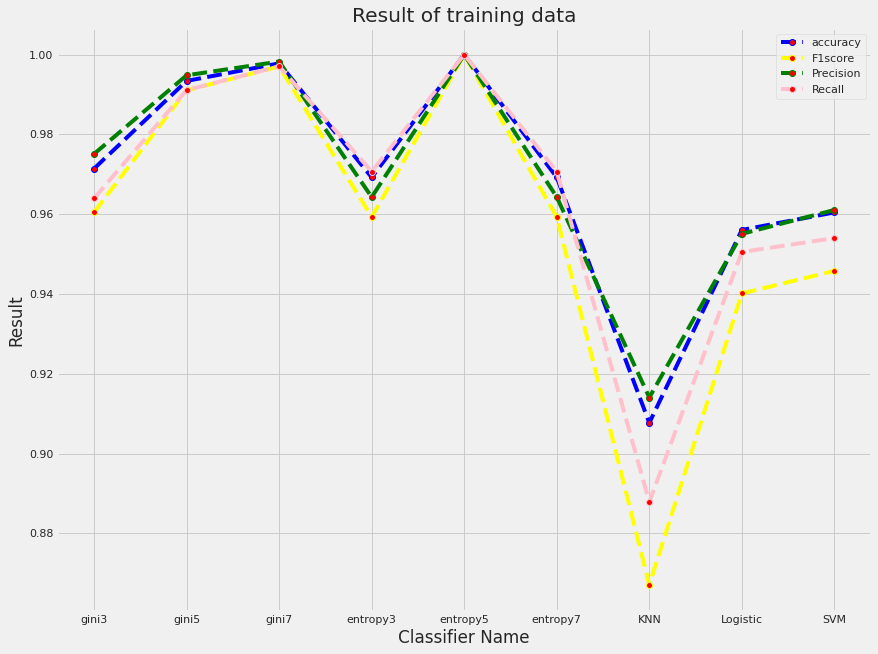

In [ ]:
classifierTrainResult = [GiniTrainResultmaxDepth3, GiniTrainResultmaxDepth5, GiniTrainResultmaxDepth7, EntropyTrainResultMaxDepth3, EntropyTrainResultMaxDepth5, EntropyTrainResultMaxDepth7,
                        knnClassifierTrainResult, logisClassifierTrainResult, svmClassifierTrainResult]

classifierName = ['gini3', 'gini5', 'gini7', 'entropy3', 'entropy5', 'entropy7', 'KNN', 'Logistic', 'SVM']

classifierTrainAccuracy = [x['accuracy'] for x in classifierTrainResult]                        
classifierTrainF1Score = [x['F1_score'] for x in classifierTrainResult]
classifierTrainPrecision = [x['precision'] for x in classifierTrainResult]
classifierTrainRecall = [x['recall'] for x in classifierTrainResult]

plt.rcParams["figure.figsize"]=13,10

plt.style.use('fivethirtyeight')

plt.plot(classifierName, classifierTrainAccuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red', label="accuracy")    
plt.plot(classifierName, classifierTrainF1Score, color='yellow',linestyle='dashed', marker='o', markerfacecolor='red', label="F1score")
plt.plot(classifierName, classifierTrainPrecision, color='green',linestyle='dashed', marker='o', markerfacecolor='red', label="Precision")
plt.plot(classifierName, classifierTrainRecall, color='pink',linestyle='dashed', marker='o', markerfacecolor='red', label="Recall")

plt.xlabel('Classifier Name')
plt.ylabel('Result')
plt.title("Result of training data")
plt.legend()
plt.show()

**Conclusion: For train set entropy max_depth:3
gives maximum recall**

## ROC AUC plot
### For test set

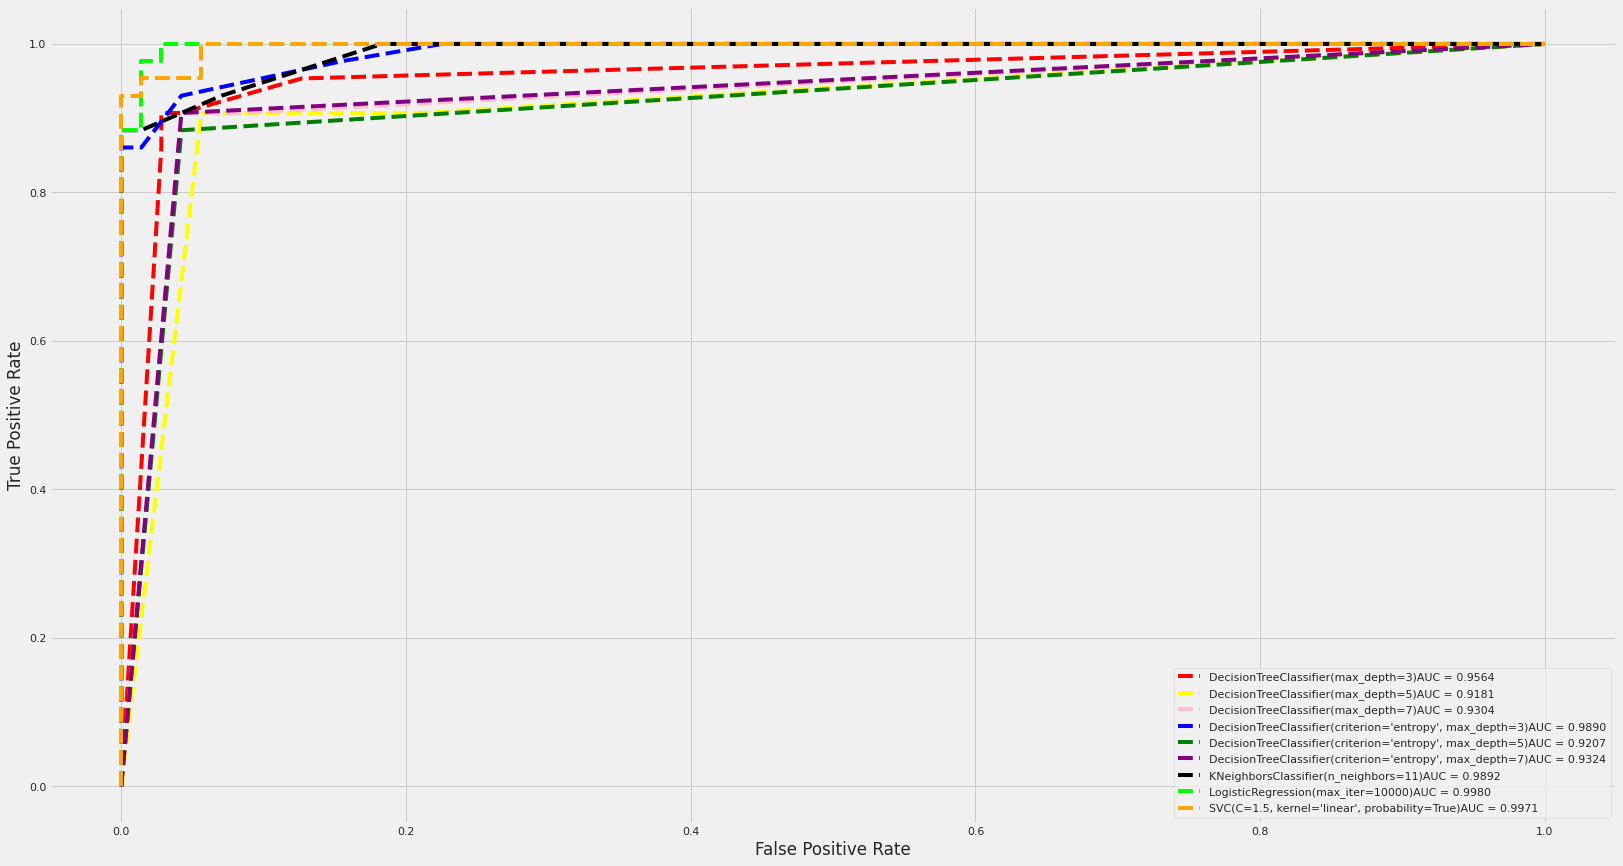

In [ ]:
plt.rcParams["figure.figsize"]=25,14
color = ['red', 'yellow', 'pink', 'blue', 'green', 'purple', 'black', 'lime', 'orange']
classfier = [giniImpurityClassifierMaxDepth3, giniImpurityClassifierMaxDepth5, giniImpurityClassifierMaxDepth7, entropyClassifierMaxDepth3,
             entropyClassifierMaxDepth5, entropyClassifierMaxDepth7, KnnClassifier, logisClassifier, svmClassifier]

for i in range(len(classfier)):
    y_pred_proba = classfier[i].predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    #create ROC curve
    plt.plot(fpr, tpr, linestyle='dashed', color=color[i], label="{}".format(classfier[i]) + 'AUC = %0.4f' % auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### For train set

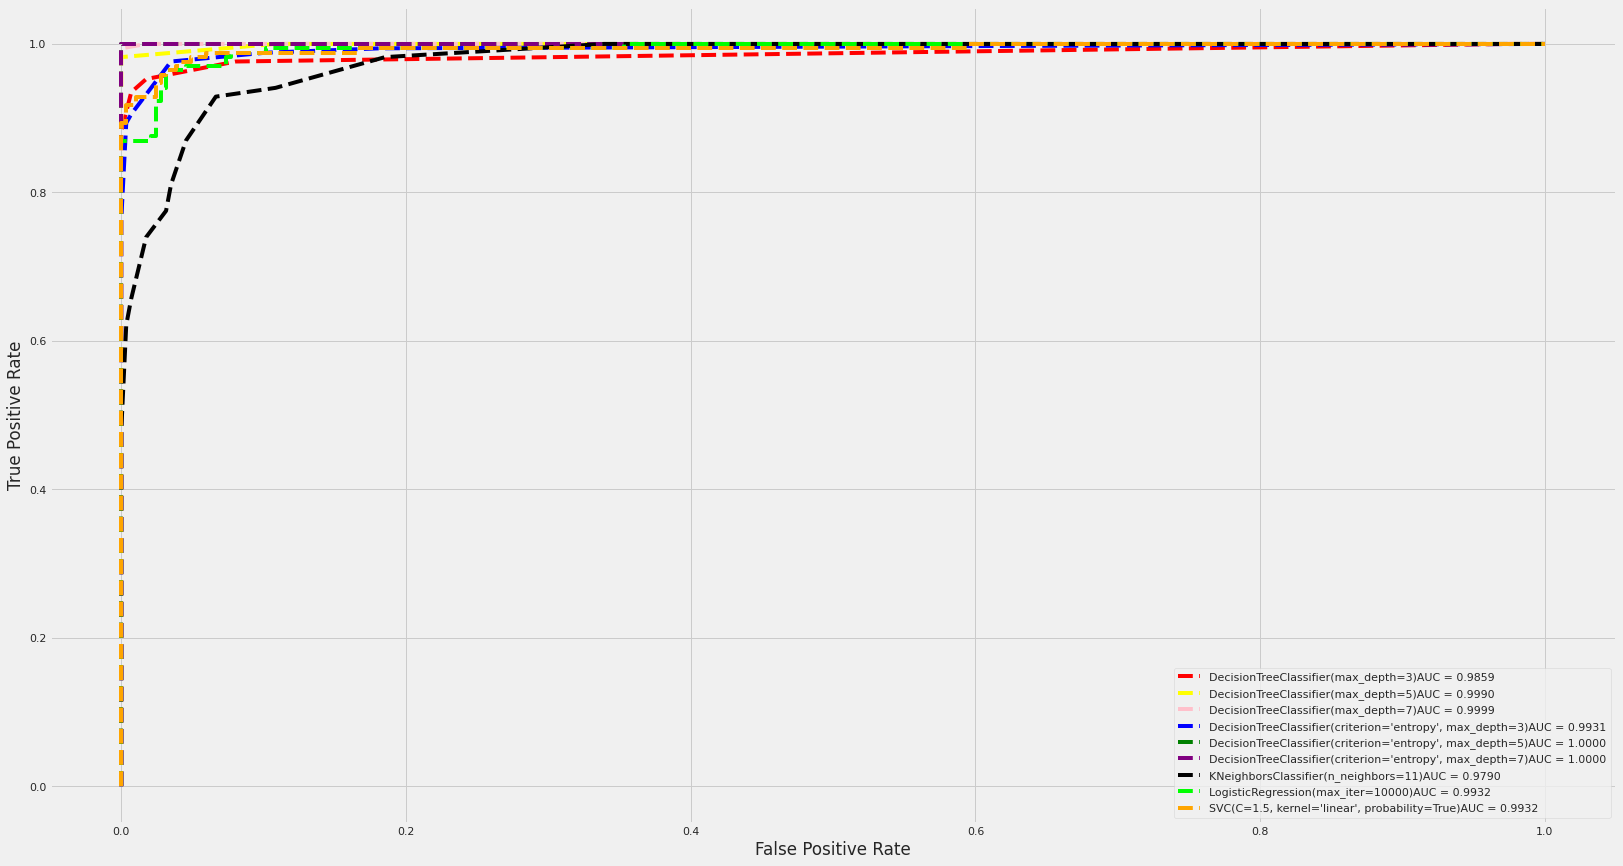

In [ ]:
for i in range(len(classfier)):
    y_pred_proba = classfier[i].predict_proba(X_train)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
    auc = metrics.roc_auc_score(y_train, y_pred_proba)

    #create ROC curve
    plt.plot(fpr, tpr, linestyle='dashed', color=color[i], label="{}".format(classfier[i]) + 'AUC = %0.4f' % auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
testResult = [GiniTestmaxDepth3, GiniTestmaxDepth5, GiniTestmaxDepth7, entropyTestmaxDepth3, entropyTestmaxDepth5, entropyTestmaxDepth7, KnnTest, logisticTest, SvmTest]
testResult = pd.DataFrame(testResult, columns=['Classifier Name', 'Accuracy', 'F1 Score', 'Precision', 'Recall']) 
testResult.to_csv("testAccuracy.csv")    # Saving accuracy of test data as testAccuracy.csv

In [ ]:
TrainResult = [GiniTrainmaxDepth3, GiniTrainmaxDepth5, GiniTrainmaxDepth7, entropyTrainmaxDepth3, entropyTrainmaxDepth5, entropyTrainmaxDepth7, KnnTrain, logisticTrain, SvmTrain]
TrainResult = pd.DataFrame(TrainResult, columns=['Classifier Name', 'Accuracy', 'F1 Score', 'Precision', 'Recall']) 
TrainResult.to_csv("TrainAccuracy.csv")  # Saving accuracy of test data as trainAccuracy.csv